Epoch 1/10, Avg. Loss: 17.4036
Epoch 2/10, Avg. Loss: 7.3472
Epoch 3/10, Avg. Loss: 3.9020
Epoch 4/10, Avg. Loss: 2.4760
Epoch 5/10, Avg. Loss: 1.7293
Epoch 6/10, Avg. Loss: 1.3631
Epoch 7/10, Avg. Loss: 1.1712
Epoch 8/10, Avg. Loss: 0.9905
Epoch 9/10, Avg. Loss: 0.8922
Epoch 10/10, Avg. Loss: 0.8096


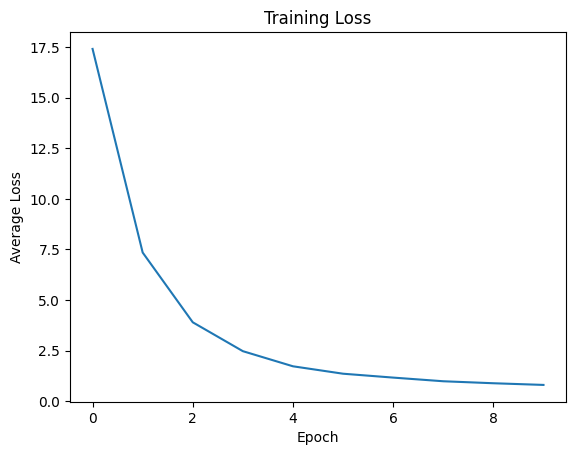

Mean Squared Error on Test Set: 0.7680


In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]


num_epochs = 10
batch_size = 16
learning_rate = 0.01
num_features = X_train.shape[1]
theta = np.random.randn(num_features)


train_losses = []

for epoch in range(num_epochs):
    total_loss = 0


    indices = np.arange(X_train.shape[0])
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train_shuffled[i:i+batch_size]
        y_batch = y_train_shuffled[i:i+batch_size]


        predictions = np.dot(X_batch, theta)
        errors = predictions - y_batch


        gradient = np.dot(X_batch.T, errors) / batch_size
        theta -= learning_rate * gradient


        batch_loss = np.mean(errors**2)
        total_loss += batch_loss

    avg_loss = total_loss / (X_train.shape[0] / batch_size)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Avg. Loss: {avg_loss:.4f}")


plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss')
plt.show()


y_pred = np.dot(X_test, theta)
mse = np.mean((y_pred - y_test)**2)
print(f"Mean Squared Error on Test Set: {mse:.4f}")
